**Решение**

**1.1**     
Введем следующие события:    
A - человек имеет редкую группу крови.    
B - человек является убийцей.    

Из условий известно, что: 


$ P(A) = 0.01 $



Прокурор оценил следующие вероятности:

$P(A| \overline{B}) = 0.01$ - то есть вероятность иметь редкую группу крови при условии, что человек не убийца.

Далее он оценил:

$1 - P(A| \overline{B}) = P(\overline{A}| \overline{B}) = 0.99$ - то есть вероятность не иметь редкую группу при условии, что человек не убийца

На самом деле прокурор должен оценить:

$P(B| A)$ -  то есть вероятность быть убийцей при условии, что человек имеет редкую группу крови

**1.2**    

Адвокат оценил вероятность **случайно** найти убийцу среди людей с редкой группой крови.

$P (B| A) = \frac{1}{10000} = 0.0001$

Адвокат не уточнил, что эта вероятность распространяется на всех людей с такой группой крови (в том числе и на подсудимого). Однако, эта вероятность скорее "дополнительные" баллые в пользу виновности подсудимого, а не абсолютное значение вероятности виновности. Необходимо также опровергнуть другие условия и улики, чтобы понимать полную вероятность подсудимого быть убийцей.

**1.3**     

Введем следующие события:    
A - человек болен    
B - у человека положительный результат теста (болен).    



Определим вероятности:    

$P(A) = 0.01$   
$P(B|\overline{A}) = 0.05$    
$P(\overline{B}|A) = 0.05$

$P(\overline{B}|\overline{A}) = 0.95$     
$P(B|A) = 0.95$   

Тогда вероятность быть больным при условии положительного теста:

$ P(A|B) = \frac{P(B|A) * P(A)}{P(B)} = \frac{0.95 * 0.01}{0.95 * 0.01 + 0.05 * 0.99} = 0.161$

Построим зависимость апостериорной вероятности быть больным после результатов положительного/отрицательного теста от величины ошибок первого и второго рода:   

In [40]:
# пусть p_AB - апостериорная вероятность быль больным при условии разных значений fp_rate (1-type-error) и fn_rate(2-type-error)
import numpy as np
import matplotlib.pyplot as plt

p_A = 0.01
p_BA = 0.95
p_notBA = 0.05 #fn
p_BnotA = 0.05 #fp
p_notBnotA = 0.95


def p_AB_fp(fp_rate):
    return (p_BA * p_A) / (p_BA * p_A + fp_rate * (1 - p_A))


fps = np.linspace(0,1, 1000)

p_AB_fps = np.array(list(map(p_AB_fp, fps))) 

Text(0, 0.5, 'p_ABs')

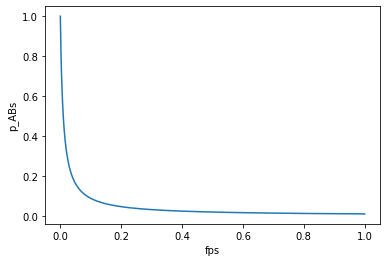

In [48]:
fig = plt.plot(fps, p_AB_fps)
plt.xlabel('fps')
plt.ylabel('p_ABs')

In [38]:
# p_AB from different false negative rates
def p_AB_fn(fn_rate):
    return (1 - fn_rate) * p_A / ( (1 - fn_rate) * p_A + p_BnotA * (1 - p_A))

fns = np.linspace(0,1, 1000)

p_AB_fns = np.array(list(map(p_AB_fn, fns)))

Text(0, 0.5, 'p_ABs')

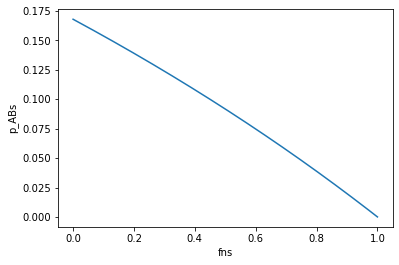

In [45]:
fig = plt.plot(fns, p_AB_fns)
plt.xlabel('fns')
plt.ylabel('p_ABs')

In [36]:
# p_AnotB from different false positive rates
def p_AnotB_fp(fp_rate):
    return (p_notBA * p_A) / (p_notBA * p_A + (1 - fp_rate) * (1 - p_A))


fps_ = np.linspace(0,1, 1000,)

p_AB_fps_ = np.array(list(map(p_AnotB_fp, fps_))) 

Text(0, 0.5, 'p_AnotBs')

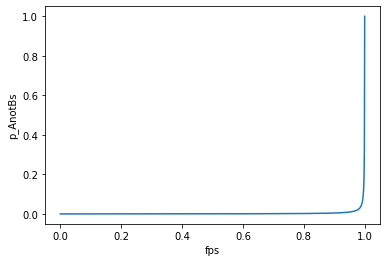

In [49]:
fig = plt.plot(fps_, p_AB_fps_)
plt.xlabel('fps')
plt.ylabel('p_AnotBs')

Text(0, 0.5, 'p_AnotBs')

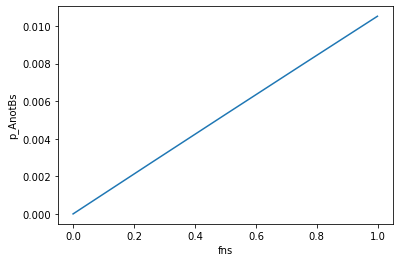

In [81]:
# p_AnotB from different false negative rates
def p_AnotB_fn(fn_rate):
    return fn_rate * p_A / ( fn_rate * p_A + (1 - p_notBA) * (1 - p_A))

fns_ = np.linspace(0,1, 1000, endpoint=False)

p_AB_fns_ = np.array(list(map(p_AnotB_fn, fns)))

fig = plt.plot(fns_, p_AB_fns_)
plt.xlabel('fns')
plt.ylabel('p_AnotBs')

Лучше всего понижать false positive rate. 

Это позволит повысить вероятность того, что человек болен при положительном результате теста. Со снижением вероятности ошибки первого рода к нулю, вероятность по такому событию стремится к единице. Тем более это также снижает вероятность того, что человек болен, если тест отрицателен, однако в меньшем количестве.
 
При этом снижение false negative rate вряд ли даст ощутимого эффекта на результатах теста.   
Вероятность иметь болезнь при отрицательном результате теста снижается линейно с достаточно низким коэффициентом изменения. И так же вероятность иметь болезнь при положительном результате теста повышается линейно с достаточно низким коэффициентом изменения. 

Поэтому лучше снизить значение false positive rate, чтобы положительный результат теста с бОльшей уверенностью указывал на действительно больного человека. Это приведет к тому, что, например, люди с положительным результатом теста будут более заинтересованы соблюдать лечение, а врачи будут более сконцентрированы на реальных больных.

**Часть 2.**   

Линейная регрессия.   


In [53]:
import pandas as pd

df = pd.read_csv('owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71489,ZWE,Africa,Zimbabwe,2021-02-22,35862.0,66.0,91.429,1441.0,5.0,4.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71490,ZWE,Africa,Zimbabwe,2021-02-23,35910.0,48.0,85.000,1448.0,7.0,4.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71491,ZWE,Africa,Zimbabwe,2021-02-24,35960.0,50.0,76.714,1456.0,8.0,5.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71492,ZWE,Africa,Zimbabwe,2021-02-25,35994.0,34.0,64.429,1458.0,2.0,5.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [55]:
cond = (df['location'] == 'Russia') & (df['date'] > '2020-03-03') 

df_rus = df[cond]
df_rus.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52923,RUS,Europe,Russia,2020-03-04,3.0,0.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52924,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52925,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52926,RUS,Europe,Russia,2020-03-07,13.0,0.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52927,RUS,Europe,Russia,2020-03-08,17.0,4.0,2.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [60]:
df_rus.loc[:, 'new_cases'] = df_rus.new_cases.replace(0, 1)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [63]:
df_rus.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52923,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52924,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [65]:
df_train = df_rus[:50]
df_test = df_rus[50:]
df_train.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,50.000000,50.000000,50.000000,35.000000,35.000000,50.000000,50.000000,50.000000,50.000000,35.000000,...,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.0,5.000000e+01,0.0,5.000000e+01,5.000000e+01,5.000000e+01
mean,9362.380000,1160.000000,849.882840,110.657143,14.657143,7.294320,64.154720,7.948180,5.823700,0.758314,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,23.4,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01
std,15196.593437,1708.216363,1320.369714,144.760643,17.350950,11.850608,104.133068,11.705726,9.047656,0.991966,...,7.349827e-12,4.205605e-17,2.296821e-13,4.485978e-15,0.0,2.871026e-14,NaN,5.383174e-15,4.306539e-14,1.121495e-16
min,3.000000,1.000000,0.143000,1.000000,0.000000,0.000000,0.021000,0.000000,0.001000,0.007000,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,23.4,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01
25%,96.000000,24.750000,11.179000,4.000000,1.000000,0.000000,0.658000,0.169250,0.076250,0.027000,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,23.4,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01
50%,1399.000000,249.000000,151.785500,45.000000,7.000000,0.714500,9.586500,1.706000,1.040000,0.308000,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,23.4,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01
75%,11470.500000,1615.000000,1067.392750,159.000000,23.000000,8.071000,78.600500,11.066750,7.314000,1.089500,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,23.4,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01
max,57999.000000,6060.000000,4787.000000,513.000000,57.000000,45.000000,397.432000,41.525000,32.802000,3.515000,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,23.4,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01


In [66]:
df_test.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,3.100000e+02,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,...,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,0.0,3.100000e+02,3.100000e+02,3.100000e+02
mean,1.633501e+06,13283.090323,13222.492184,28963.032258,268.990323,265.546529,11193.388445,91.020932,90.605687,198.466016,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,2.340000e+01,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01
std,1.225390e+06,7807.153271,7816.770549,23931.871143,176.670016,173.142542,8396.854965,53.497660,53.563583,163.990567,...,7.287721e-11,5.421088e-16,2.334348e-12,1.779229e-14,1.174291e-13,3.344950e-13,NaN,5.337687e-15,4.412488e-13,5.448888e-15
min,6.277300e+04,4639.000000,4720.286000,555.000000,42.000000,46.143000,430.145000,31.788000,32.345000,3.803000,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,2.340000e+01,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01
25%,7.078958e+05,6410.250000,6408.428750,10869.500000,119.000000,120.606750,4850.778750,43.925750,43.913000,74.482000,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,2.340000e+01,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01
50%,1.127532e+06,10467.500000,9870.214000,19920.000000,181.500000,165.143000,7726.290000,71.727000,67.634500,136.499500,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,2.340000e+01,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01
75%,2.567268e+06,20213.250000,20154.642750,45219.750000,448.500000,463.178250,17591.921250,138.509000,138.107750,309.863500,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,2.340000e+01,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01
max,4.175757e+06,29499.000000,28501.143000,83900.000000,624.000000,554.571000,28613.920000,202.139000,195.301000,574.916000,...,2.476595e+04,1.000000e-01,4.312970e+02,6.180000e+00,2.340000e+01,5.830000e+01,NaN,8.050000e+00,7.258000e+01,8.240000e-01


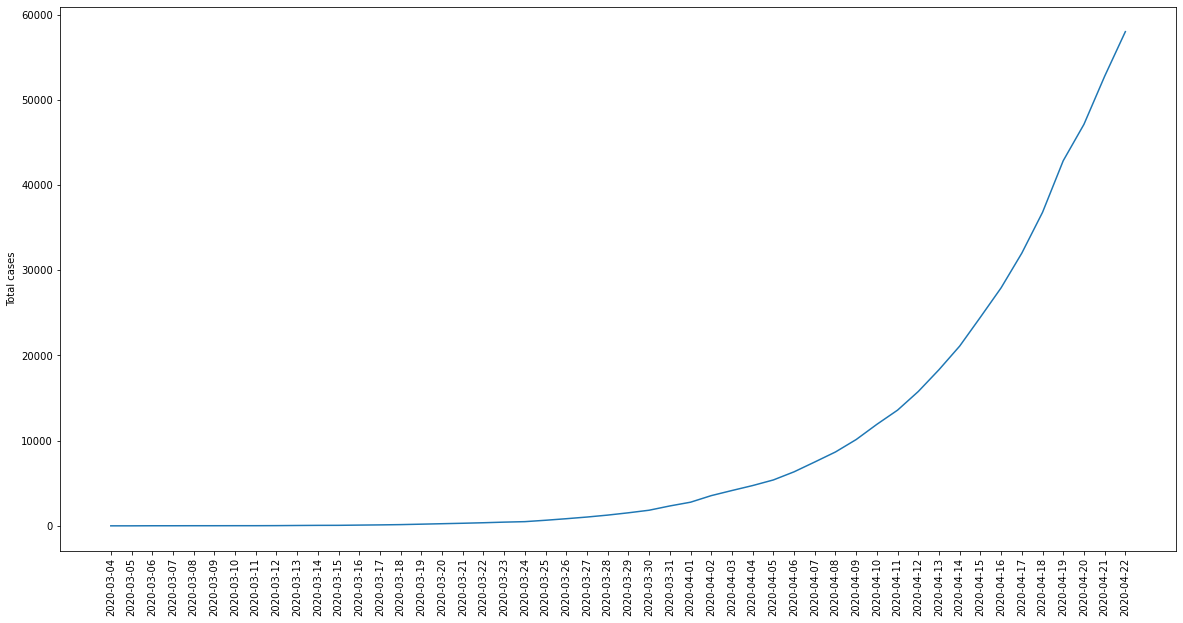

In [77]:
fig, ax = plt.subplots(figsize=[20,10])
ax = plt.plot(df_train.date, df_train.total_cases)
plt.xticks(rotation = 90)
plt.ylabel('Total cases')
plt.show()

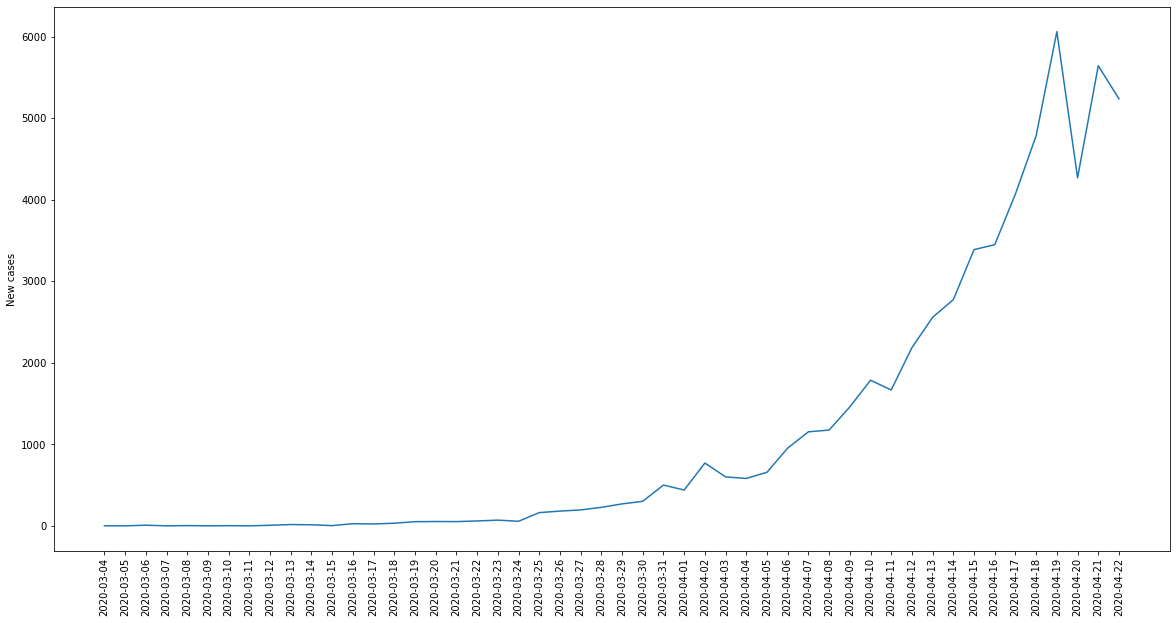

In [78]:
fig, ax = plt.subplots(figsize=[20,10])
ax = plt.plot(df_train.date, df_train.new_cases)
plt.xticks(rotation = 90)
plt.ylabel('New cases')
plt.show()

Понятно, что от задачи экспоненциальной регресси, можно перейти к следующей задаче:    
$ln(y) = Ax + e$  
где e - ошибка с нормальным распределением вокруг 0

In [100]:
from math import log 
from sklearn.linear_model import LinearRegression

y_train = np.array(np.log(df_train.total_cases)).reshape(-1, 1)
x_train = np.array(df_train.reset_index().index).reshape(-1, 1)

In [101]:
y_train[:5]

array([[1.09861229],
       [1.38629436],
       [2.56494936],
       [2.56494936],
       [2.83321334]])

In [98]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [106]:
x_test = np.array(list(map(lambda x: x+50, df_train.reset_index().index))).reshape(-1, 1)

y_test_pred = model.predict(x_test)

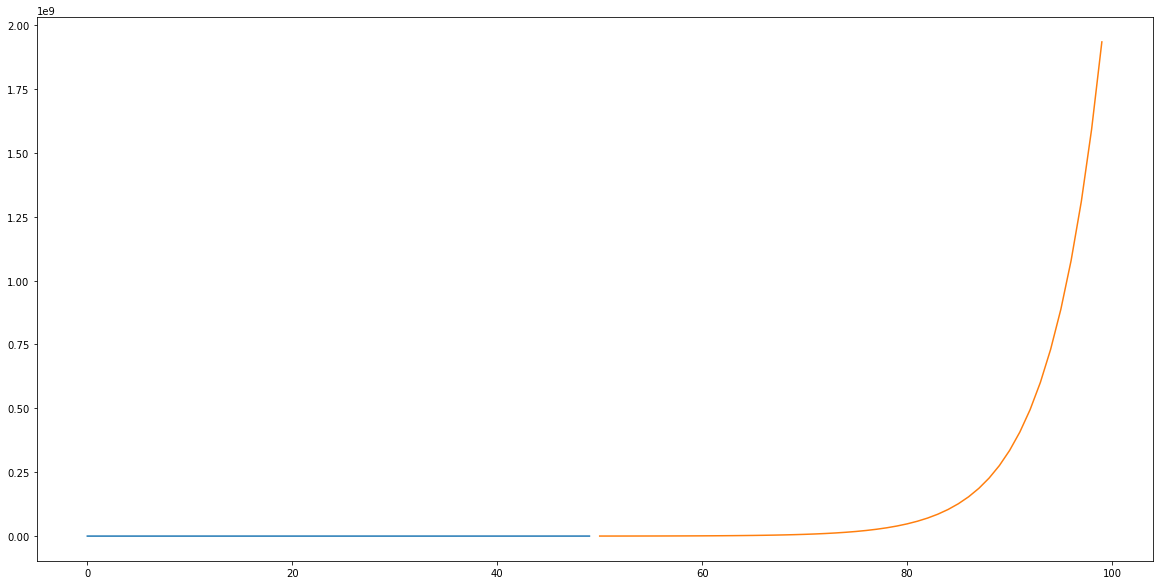

In [112]:
fix, ax = plt.subplots(figsize=[20,10])
ax = plt.plot(x_train, np.exp(y_train))
ax = plt.plot(x_test, np.exp(y_test_pred))